# CONVOLUTIONAL NEURAL NETWORK

![cnn](gec2.jpg)

### import the libraries

In [1]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.15.0'

### part-1 data preprocessing

### preprocesing the training set

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                 zoom_range=0.2,
                                horizontal_flip=True)
traning_set=train_datagen.flow_from_directory(r"D:\partiise section\dataset\dataset\training_set",
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode="binary")

Found 8000 images belonging to 2 classes.


### preprocessing the test set

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory(r"D:\partiise section\dataset\dataset\test_set",
                                         target_size=(64,64),
                                         batch_size=32,
                                         class_mode="binary")

Found 2000 images belonging to 2 classes.


# part-2 Building the CNN

In [6]:
cnn=tf.keras.models.Sequential()

### step-1 convolution

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=[64,64,3]))

### step-2 pooling

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### adding the second convolution layers

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### step-3 flattening

In [10]:
cnn.add(tf.keras.layers.Flatten())

### step-4 full connection

In [11]:
cnn.add(tf.keras.layers.Dense(units=64,activation="relu"))

### step-5 output layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

# training the cnn

In [13]:
cnn.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [14]:
cnn.fit(x=traning_set,validation_data=test_set,epochs=25)

Epoch 1/25


250/250 [==============================] - 22s 86ms/step - loss: 0.6799 - accuracy: 0.5602 - val_loss: 0.6268 - val_accuracy: 0.6655
Epoch 2/25
250/250 [==============================] - 24s 97ms/step - loss: 0.6153 - accuracy: 0.6626 - val_loss: 0.5868 - val_accuracy: 0.6890
Epoch 3/25
250/250 [==============================] - 24s 97ms/step - loss: 0.5526 - accuracy: 0.7205 - val_loss: 0.5384 - val_accuracy: 0.7420
Epoch 4/25
250/250 [==============================] - 22s 88ms/step - loss: 0.5254 - accuracy: 0.7376 - val_loss: 0.5076 - val_accuracy: 0.7610
Epoch 5/25
250/250 [==============================] - 22s 89ms/step - loss: 0.5053 - accuracy: 0.7529 - val_loss: 0.5066 - val_accuracy: 0.7455
Epoch 6/25
250/250 [==============================] - 23s 92ms/step - loss: 0.4852 - accuracy: 0.7688 - val_loss: 0.4955 - val_accuracy: 0.7700
Epoch 7/25
250/250 [==============================] - 23s 91ms/step - loss: 0.4770 - accuracy: 0.7753 - val_loss: 0.4821 - val_accurac

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

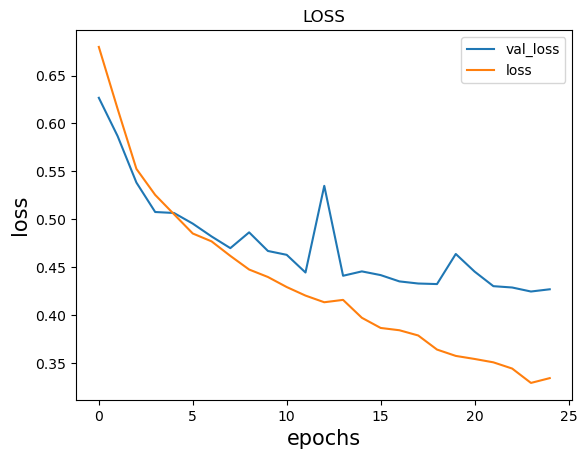

In [16]:
pf=pd.DataFrame(cnn.history.history)
plt.plot(pf["val_loss"],label="val_loss")
plt.plot(pf["loss"],label="loss")
plt.xlabel("epochs",size=15)
plt.ylabel("loss",size=15)
plt.title("LOSS")
plt.legend()
plt.show()

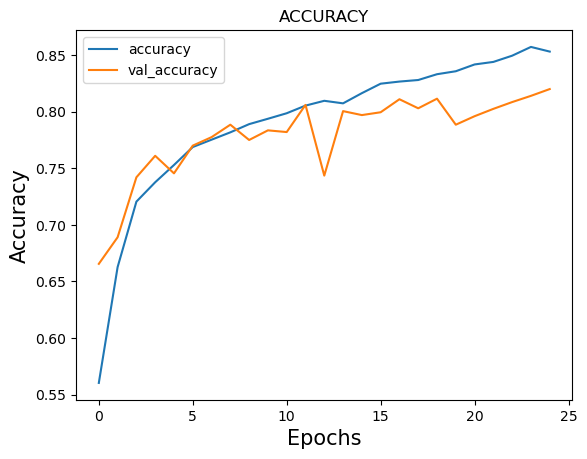

In [17]:
pf=pd.DataFrame(cnn.history.history)
plt.plot(pf["accuracy"],label="accuracy")
plt.plot(pf["val_accuracy"],label="val_accuracy")
plt.xlabel("Epochs",size=15)
plt.ylabel("Accuracy",size=15)
plt.title("ACCURACY")
plt.legend()
plt.show()

In [18]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img(r"D:\partiise section\dataset\dataset\single prd\cat.4061.jpg",target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
traning_set.class_indices
if result[0][0]==1:
    prediction='dog'
else:
    prediction='cat'

1/1 [==============================] - 0s 190ms/step


In [19]:
print(prediction)

cat


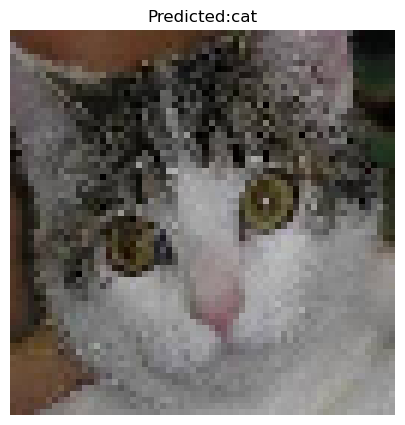

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.imshow(test_image[0].astype("int64")/255)
plt.title(f"Predicted:{prediction}")
plt.axis('off')
plt.show()